In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Dow_Jones = pd.read_csv('Dow Jones Industrial Average Historical Data.csv')

In [3]:
Dow_Jones.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 31, 2019","28,538.44","28,414.64","28,547.35","28,376.49",193.34M,0.27%
1,"Dec 30, 2019","28,462.14","28,654.76","28,664.69","28,428.98",185.07M,-0.64%
2,"Dec 27, 2019","28,645.26","28,675.34","28,701.66","28,608.98",184.93M,0.08%
3,"Dec 26, 2019","28,621.39","28,539.46","28,624.10","28,535.15",155.97M,0.37%
4,"Dec 24, 2019","28,515.45","28,572.57","28,576.80","28,503.21",95.29M,-0.13%


In [4]:
# Replacing the Price Column of the dataset 
Dow_Jones['Price'] = Dow_Jones['Price'].apply(lambda x: x.replace(',',''))

# Replacing the Open Column of the dataset 
Dow_Jones['Open'] = Dow_Jones['Open'].apply(lambda x: x.replace(',',''))

# Replacing the High Column of the dataset 
Dow_Jones['High'] = Dow_Jones['High'].apply(lambda x: x.replace(',',''))

# Replacing the Low Column of the dataset 
Dow_Jones['Low'] =Dow_Jones['Low'].apply(lambda x: x.replace(',',''))

In [5]:
# Spliting the Vol. Feature Eg. 193.4M to 193.4
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].str.split("M", n = 1, expand = True)

In [6]:
# Replacing the null values to Zero
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].replace(to_replace =["-"], value = 0)

In [7]:
# Conerting the format of the Price Column from object <--> Float
Dow_Jones['Price'] = Dow_Jones['Price'].astype(float)

# Conerting the format of the Open Column from object <--> Float
Dow_Jones['Open'] = Dow_Jones['Open'].astype(float)

# Conerting the format of the High Column from object <--> Float
Dow_Jones['High'] = Dow_Jones['High'].astype(float)

# Conerting the format of the low Column from object <--> Float
Dow_Jones['Low'] = Dow_Jones['Low'].astype(float)

# Conerting the format of the Vol Column from object <--> float
Dow_Jones['Vol.'] = Dow_Jones['Vol.'].astype(float)

# Conerting the format of the Change% Column from object <--> str
Dow_Jones['Change %'] = Dow_Jones['Change %'].astype(str)

In [8]:
Dow_Jones.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object

In [9]:
X = Dow_Jones[['Open','Low','High','Vol.']]
y = Dow_Jones['Price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#Importing the required Libraries

from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Create Linear SVM object
support = svm.LinearSVR(random_state=20)

In [14]:
support.fit(X_train, y_train)
Y_pred = support.predict(X_test)

In [15]:
#Choice of metrics influences how the performance of machine learning algorithms is measured and compared.
from sklearn import metrics

# calculating the mean absolute error
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, Y_pred))

# calculating the mean squared error
print('Mean Squared Error :', metrics.mean_squared_error(y_test, Y_pred))

# calculating the root mean squared error
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Absolute Error : 53.00768508420614
Mean Squared Error : 4767.172269809733
Root Mean Squared Error : 69.04471210606742


In [16]:
# Calculate the absolute errors
errors = abs(Y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy= 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 53.01 degrees.
Accuracy: 99.67 %.


In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

0.9998463682051357

In [18]:
result = pd.DataFrame({'Actual' : y_test , 'Predicted' : Y_pred}).reset_index()[['Actual' , 'Predicted']]
result

,Actual,Predicted
0,16408.54,16372.616373
1,18308.15,18290.400127
2,7776.18,7740.274037
3,12393.90,12372.026389
4,16201.32,16043.874165
...,...,...
549,10296.85,10247.360931
550,18070.40,18069.037879
551,11613.30,11612.324106
552,17098.45,17028.067810


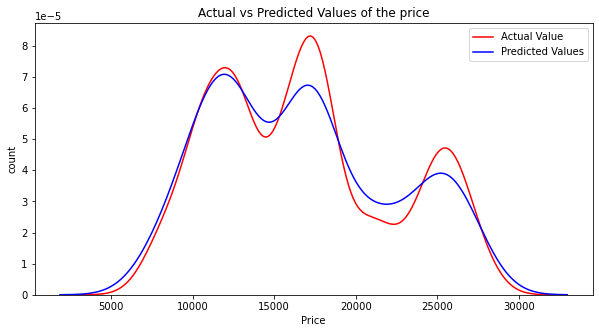

In [19]:
# plotting a distrubution plot for comparing the actual and the predicted values
plt.figure(figsize=(10, 5))
ax = sns.distplot(y, hist=False, bins=100, color="red", label ='Actual Value')
sns.distplot(Y_pred, hist=False, bins=100, color="blue", label ='Predicted Values' , ax=ax)
plt.xlabel('Price')
plt.ylabel('count')
plt.title('Actual vs Predicted Values of the price')
plt.legend()
plt.show()
plt.close()